# Classification: Logistic Regression

In [1]:
#IMPORT DATA
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [2]:
data.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


target
0    500
1    268
dtype: int64


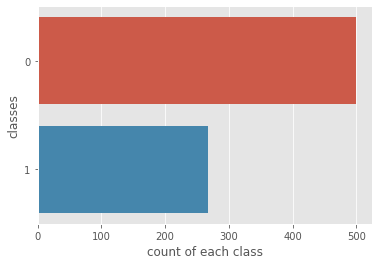

In [3]:
#Print class freq. through pandas 
print(data.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.target ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [4]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#basic statistic details about the data
data.describe(include="all")

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


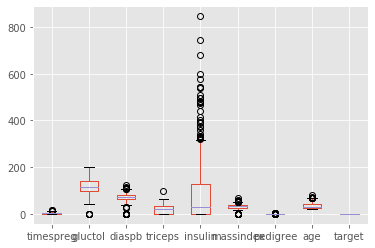

In [6]:
data.boxplot()

In [7]:
#Separate X and y (explanatory variables and target variable)
X = data.iloc[:,0:-1]
column_names = list(X) 
y = data.iloc[:,-1] 

#X.head()
#y.head()

In [8]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
'''
USING STANDARDSCALER:

Standardize features by removing the mean and scaling to unit variance

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
'''

scaler = StandardScaler().fit(X) 
#scaler =  MinMaxScaler().fit(X)

In [9]:
X_scaled = scaler.transform(X)

In [10]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = column_names

X_scaled.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


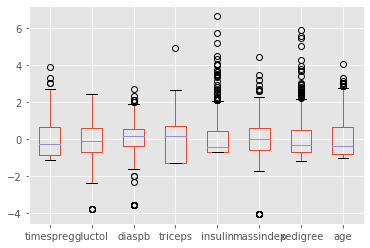

In [11]:
X_scaled.boxplot()

In [12]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(537, 8)


## Logistic Regression Model

The model postulates that

$$ z=\log\left[\frac{P(y=1|x)}{P(y=-1|x)}\right]=w^T x$$

then if $p=P(y=-1|x)$

$$ \frac{1-p}{p}=e^{w^T x}\\ \Rightarrow  P(y=-1|x)=\frac{1}{1+\exp(w^T x)},\quad P(y=1|x)=\frac{\exp(w^T x)}{1+\exp(w^T x)}=\frac{1}{1+\exp(-w^T x)}
$$
Thus $$P(y=y_i|x)=\frac{1}{1+\exp(-y_i w^T x)}$$

![sigmoid](sigmoid.png)

Therefore if we maximizes the likelihood
$$
L(w) :=P(Y_1=y_1,\ldots,Y_m=y_m|w,x_1,\dots,x_m) =\Pi_{i=1}^nP(Y_i=y_i|w,x_1,\dots,x_m) .
$$
is equivalent to maximize the function
$$\log(L(w))=\sum_{i=1}^n \frac{1}{1+\exp(-y_i w^T x)}$$

Therefore we aim to resolve the following optimizaion problem
$$\min_{w} \frac{1}{2}||w||^2 + C \sum_{i=1}^n \log(1+\exp(- y_i (w^T X_i))) $$

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10, solver='lbfgs')
model.fit(X_train, y_train)
# penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
# tol : Tolerance for stopping criteria.
# C : Inverse of regularization strength
# solver : Algorithm to use in the optimization problem{ ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
# max_iter : Maximum number of iterations taken for the solvers to converge.

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [15]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l1','l2'] , "max_iter":[1000]}

In [16]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [17]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

In [18]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.633894 using {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1'}
0.589277 (0.076740) with: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1'}
0.626410 (0.066331) with: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1'}
0.633894 (0.077374) with: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1'}
0.631186 (0.079037) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}
0.631116 (0.081985) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
nan (nan) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}
0.628980 (0.079240) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


In [26]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [27]:
print(gs.best_estimator_.coef_)
print(X_train.columns)

[[ 0.08887231  0.03664107 -0.01185774  0.00584018 -0.00168913  0.08010084
   0.05456065  0.00631812]]
Index(['timespreg', 'gluctol', 'diaspb', 'triceps', 'insulin', 'massindex',
       'pedigree', 'age'],
      dtype='object')


In [28]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6507462686567165
--
***RESULTS ON TEST SET***
f1_score:  0.5957446808510639


In [29]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.70      0.52      0.60        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [30]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[132  18]
 [ 39  42]]


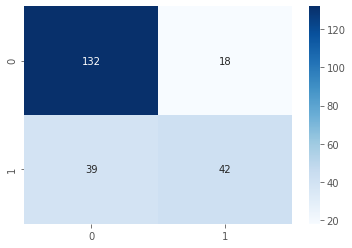

In [31]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


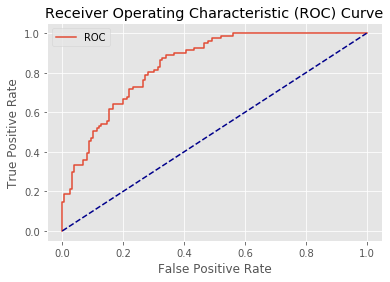

AUC: 0.84


In [32]:
from sklearn import metrics

model = LogisticRegression(C=0.01,solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)